In [2]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
import pandas as pd
import pickle
import matplotlib.colors as mcolors

In [3]:
dir='//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/'

In [4]:
data = ert.load(dir+"res2dinv_inputs/amphibious_ERT_eastern_transect2_gps.Dat")
data

29/05/24 - 08:47:19 - pyGIMLi - INFO - could not read unified data format for ERT ... try res2dinv


Data: Sensors: 76 data: 1197, nonzero entries: ['a', 'b', 'm', 'n', 'rhoa', 'valid']

29/05/24 - 09:35:39 - pyGIMLi - INFO - Create default mesh for geometric factor calculation.
29/05/24 - 09:35:46 - pyGIMLi - INFO - Save RVector binary
29/05/24 - 09:35:46 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\7018538679335446695
29/05/24 - 09:35:46 - pyGIMLi - INFO - Save RVector binary
29/05/24 - 09:35:46 - pyGIMLi - INFO - Cache stored: C:\Users\mealiy001\AppData\Roaming\pygimli\Cache\1549734802292252042


1197 [31.35175691174457,...,31.38179609817729]

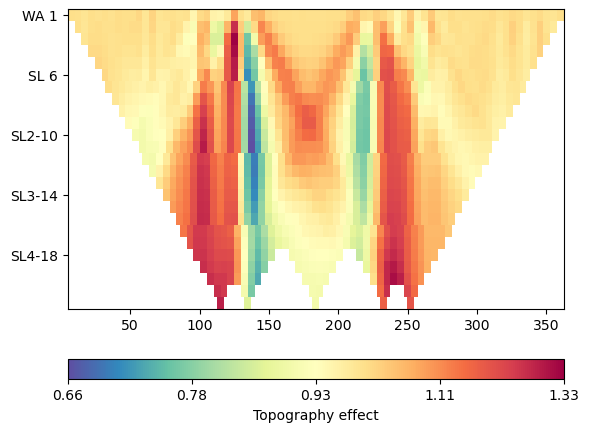

In [13]:
data.setSensorPositions(pg.meshtools.interpolateAlongCurve(data.additionalPoints(), pg.x(data)))
data['k'] = ert.createGeometricFactors(data, numerical=True)
mgr = ert.ERTManager(sr=False)
k0 = ert.createGeometricFactors(data)
ert.showData(data, vals=k0/data['k'], label='Topography effect')
data
data['k']

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x228cd6a3150>)

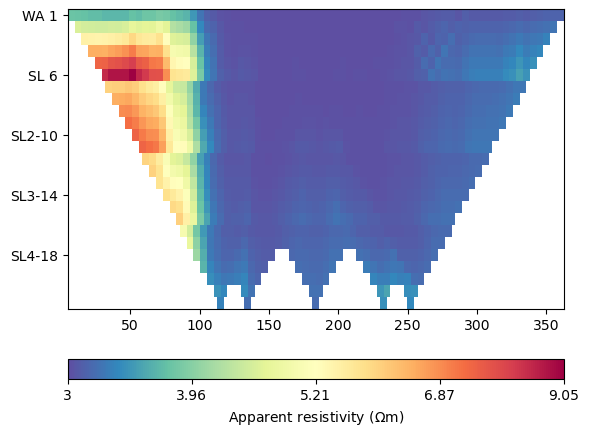

In [14]:
data['err'] = ert.estimateError(data, relativeError=0.03, absoluteUError=5e-5)
ert.show(data, data['err']*100)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x22934beac10>)

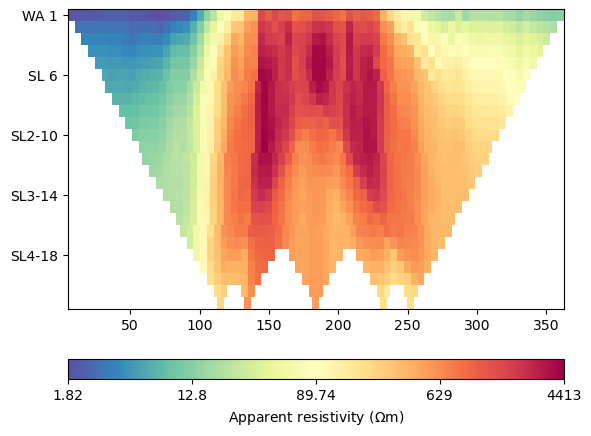

In [15]:
ert.showData(data)

In [ ]:
#topo = np.column_stack((ibpt_x, adjusted_topography+0.5))
#toporeg = mt.createPolygon(topo)

0 -9.999612822487125 -2.524
1 -9.999612822487125 -148.9417408535161
2 375.8080510403364 -148.9417408535161
3 375.8080510403364 -2.618365566376386
4 -375.8080510403364 -2.524
5 -375.8080510403364 -514.655813504989
6 741.6164892581858 -2.618365566376386
7 741.6164892581858 -514.7501790713654
8 0.0 -2.524
9 1.2499032074956116 -2.5349991482259613
10 3.7497096224868347 -2.5569974446778843
11 4.999612829982446 -2.5679965929038455
12 6.249316461863963 -2.5872413900042917
13 8.748723725626999 -2.625730984205185
14 9.998427357508515 -2.644975781305631
15 11.2482705442372 -2.630987995686838
16 13.747956917694571 -2.6030124244492523
17 14.997800104423257 -2.5890246388304594
18 16.24775801797403 -2.5817719130728363
19 18.74767384507557 -2.5672664615575904
20 19.997631758626344 -2.5600137357999673
21 21.247618948366913 -2.5560122374359047
22 23.747593327848048 -2.548009240707779
23 24.997580517588617 -2.5440077423437164
24 26.245945200476505 -2.498836901553069
25 28.74267456625228 -2.40849521997177

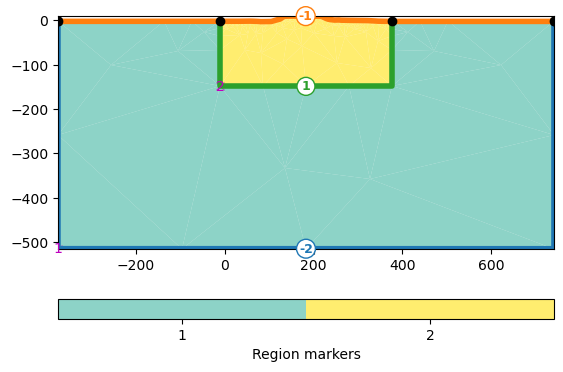

In [16]:
plc = mt.createParaMeshPLC(data, paraDX = 0.25, paraDZ= 0.25, boundary=1)
ax, _ = pg.show(plc, markers=True)

for i, n in enumerate(plc.nodes()):
    #ax.text(n.x(), n.y(), str(i))
    print(i, n.x(), n.y())
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())

30/05/24 - 09:22:06 - pyGIMLi - INFO - Found 4 regions.
30/05/24 - 09:22:06 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


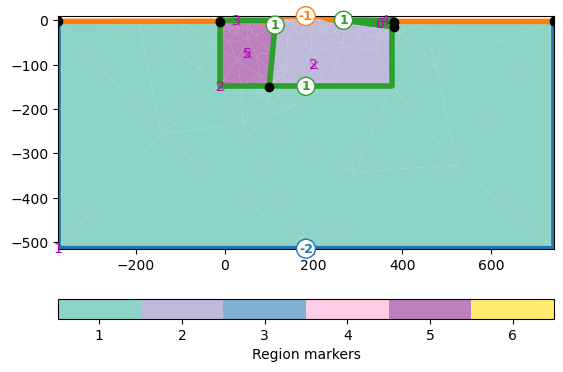

In [20]:
l1 = mt.createLine([-10,0], [-10, -5], boundary=-1)
l2 = mt.createLine([-10,0], [114.46263419360339, 0], boundary=-1)
l3 = mt.createLine([265.47100473984017,0], [380.40414484508244, 0], boundary=-1)
l4 = mt.createLine([380.40414484508244,0], [380.40414484508244, -5], boundary=-1)
l5 = mt.createLine([114.46263419360339, 0], [100, -150.8110641508107], boundary = 2)
l6 = mt.createLine([265.47100473984017,0], [380.40414484508244, -15], boundary = 2)

plc2 = mt.mergePLC([plc, l1, l2, l3, l4])
plc2.addRegionMarker([25, -1], marker=3)  
plc2.addRegionMarker([360, -1.5], marker=4) 
mesh = mt.createMesh(plc2)
mgr.setMesh(mesh)

plc3 = mt.mergePLC([plc, l1, l2, l3, l4, l5, l6])

plc3.addRegionMarker([200, -100], marker=2)    
plc3.addRegionMarker([25, -1], marker=3)  
plc3.addRegionMarker([360, -1.5], marker=4)  
plc3.addRegionMarker([50, -75], marker=5)  
plc3.addRegionMarker([350, -7], marker=6)  

ax, _ = pg.show(plc3, markers=True)
#ax.set_ylim(-150, 10)
#ax.set_xlim(-11,381)

(-11.0, 381.0)

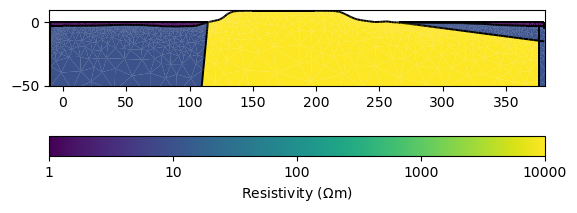

In [18]:

# Create a mesh for the finite element modelling with appropriate mesh quality.
mesh_mod = mt.createMesh(plc3, quality=34)
# rhomap_lbsw low background salty water
# rhomap_hbsw high background salty water
# rhomap_lbfw low background fresh water
# rhomap_hbfw high background fresh water
# rhomap_lba low background air
# rhomap_hba high background air


rhomap_lbsw = [[1, 10.],
          [2, 10000.],
          [3, 1.],
          [4, 1.],
          [5, 10.],
          [6, 10]]

rhomap_hbsw = [[1, 100000.],
          [2, 10000.],
          [3, 1.],
          [4, 1.],
          [5, 10.],
          [6, 10]]

rhomap_lbfw = [[1, 10.],
          [2, 10000.],
          [3, 100.],
          [4, 100.],
          [5, 10.],
          [6, 10]]

rhomap_hbfw = [[1, 100000.],
          [2, 10000.],
          [3, 100.],
          [4, 100.],
          [5, 10.],
          [6, 10]]

rhomap_lba = [[1, 10.],
          [2, 10000.],
          [3, 1000000.],
          [4, 1000000.],
          [5, 10.],
          [6, 10]]

rhomap_hba = [[1, 100000.],
          [2, 10000.],
          [3, 1000000.],
          [4, 1000000.],
          [5, 10.],
          [6, 10]]

# Take a look at the mesh and the resistivity distribution
ax, _ = pg.show(mesh_mod, logScale=True, data=rhomap_lbsw, label=pg.unit('res'), showMesh=False, showNodes=False)
ax.set_ylim(-50, 10)
ax.set_xlim(-11,381)

29/05/24 - 09:41:56 - pyGIMLi - INFO - Creating forward mesh from region infos.
29/05/24 - 09:41:59 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
29/05/24 - 09:42:05 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 171117 Cells: 340648 Boundaries: 256278
29/05/24 - 09:42:10 - pyGIMLi - INFO - Use median(data values)=4869.463241980603
29/05/24 - 09:42:10 - pyGIMLi - INFO - Created startmodel from forward operator: 41664, min/max=4869.463242/4869.463242
29/05/24 - 09:42:10 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000228997A2FC0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000228CD653F10>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002289A9C0900>
min/max (data): 1.94/1.4e+04
min/max (error): 3%/9.05%
min/max (start model): 4869/4869
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 8943.64
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  768.42 (dPhi = 91.30%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  323.91 (dPhi = 57.68%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   81.56 (dPhi = 73.64%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   45.16 (dPhi = 42.39%) lam: 10.0
----------

29/05/24 - 10:49:28 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/FM_lbsw\ERTManager


Path //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/FM_lbsw\ERTManager already exists. Skipping


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/FM_lbsw\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: >)

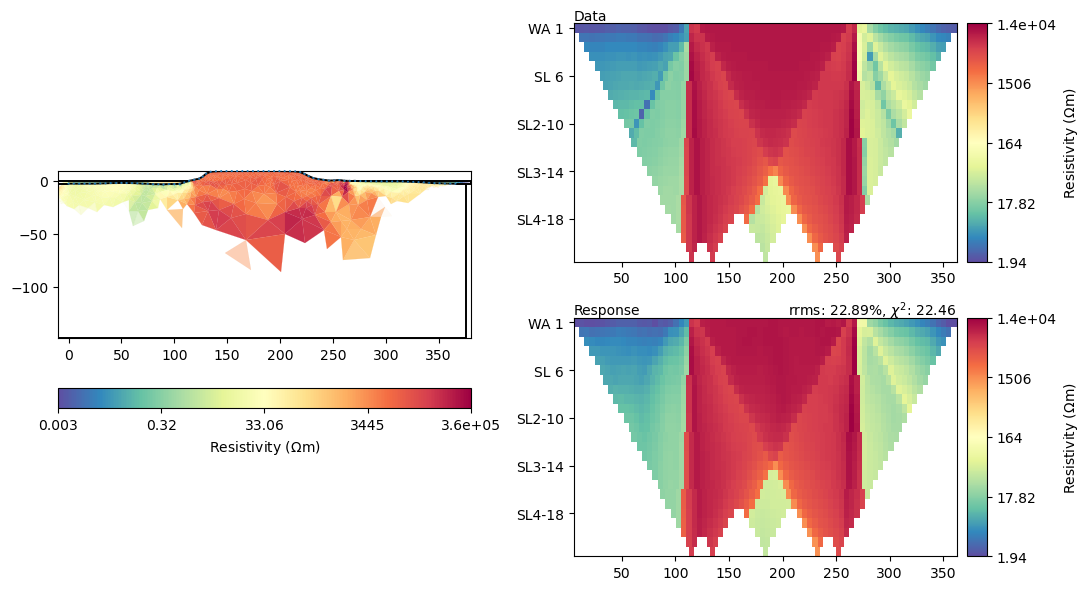

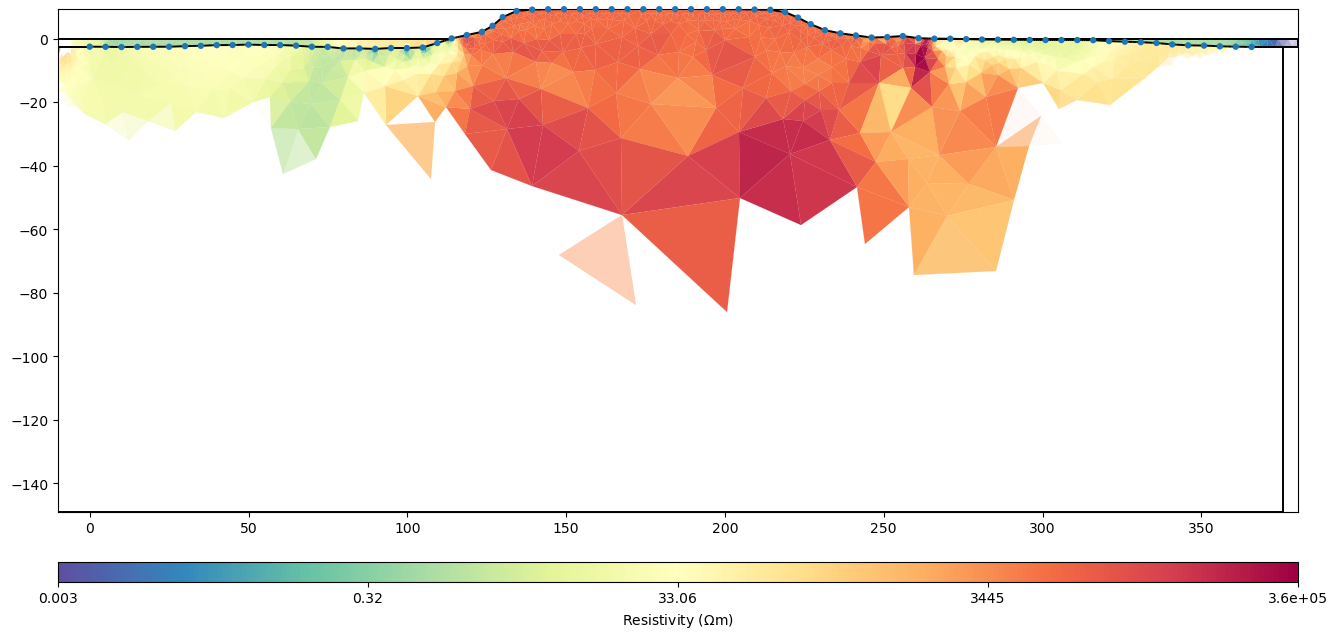

In [19]:
data_lbsw = ert.simulate(mesh_mod, scheme=data, res=rhomap_lbsw)
inv_lbsw = mgr.invert(data_lbsw, lam=10, verbose=True)
mgr.showResultAndFit()
mgr.saveResult(dir+ 'pygimli/all_inversions/FM_lbsw')


26/05/24 - 20:25:47 - pyGIMLi - INFO - Use median(data values)=5018.077409101357
26/05/24 - 20:25:47 - pyGIMLi - INFO - Created startmodel from forward operator: 9077, min/max=5018.077409/5018.077409
26/05/24 - 20:25:47 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000254919DD7B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002548C0E84F0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002548CF7ECF0>
min/max (data): 1.44/1.5e+04
min/max (error): 3%/9.07%
min/max (start model): 5018/5018
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 8310.77
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  516.67 (dPhi = 93.72%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  198.22 (dPhi = 61.40%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   41.06 (dPhi = 77.57%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   25.03 (dPhi = 36.88%) lam: 10.0
----------

26/05/24 - 20:34:44 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/FM_hbsw\ERTManager


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/FM_hbsw\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: >)

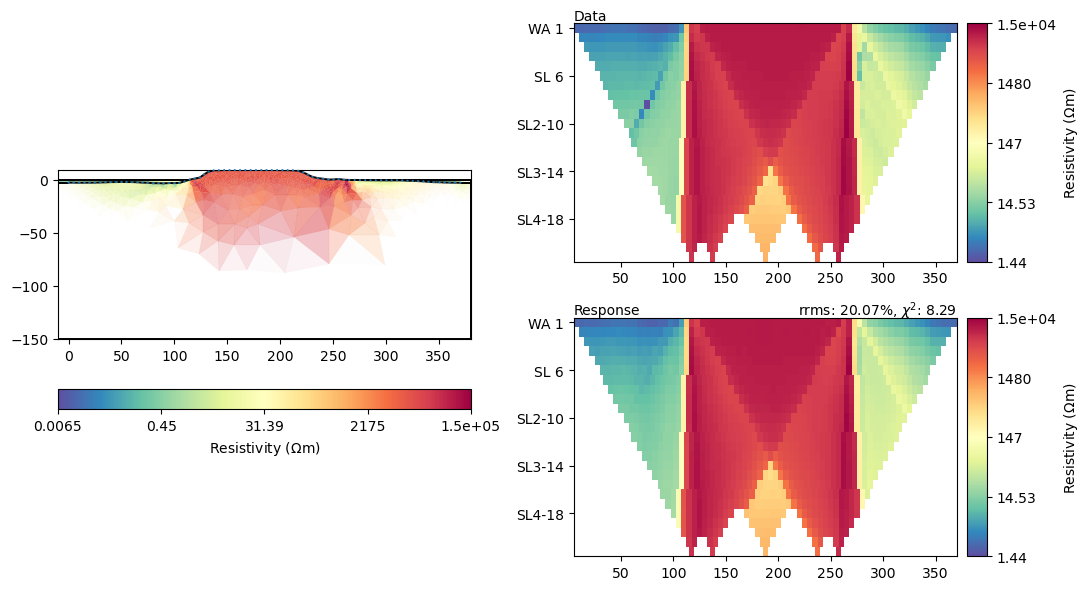

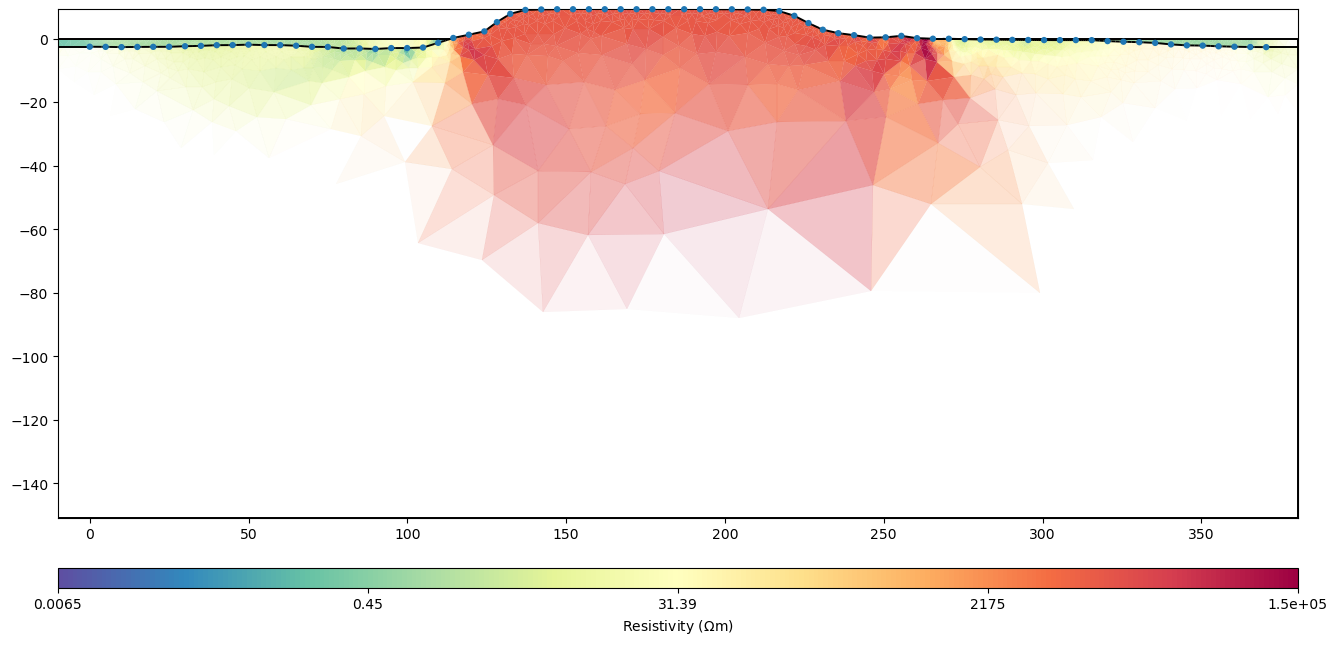

In [100]:
data_hbsw = ert.simulate(mesh_mod, scheme=data, res=rhomap_hbsw)
inv_hbsw = mgr.invert(data_hbsw, lam=10, verbose=True)
mgr.showResultAndFit()
mgr.saveResult(dir+ 'pygimli/all_inversions/FM_hbsw')

26/05/24 - 20:52:07 - pyGIMLi - INFO - Use median(data values)=4684.472751650377
26/05/24 - 20:52:07 - pyGIMLi - INFO - Created startmodel from forward operator: 9077, min/max=4684.472752/4684.472752
26/05/24 - 20:52:07 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000254919DD7B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002548C0E84F0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002548CF7ECF0>
min/max (data): 4.92/1.5e+04
min/max (error): 3%/9.07%
min/max (start model): 4684/4684
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 6801.05
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1165.66 (dPhi = 82.77%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  308.24 (dPhi = 73.44%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   50.42 (dPhi = 82.49%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   23.42 (dPhi = 51.20%) lam: 10.0
----------

26/05/24 - 21:01:16 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/FM_lbfw\ERTManager


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/FM_lbfw\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: >)

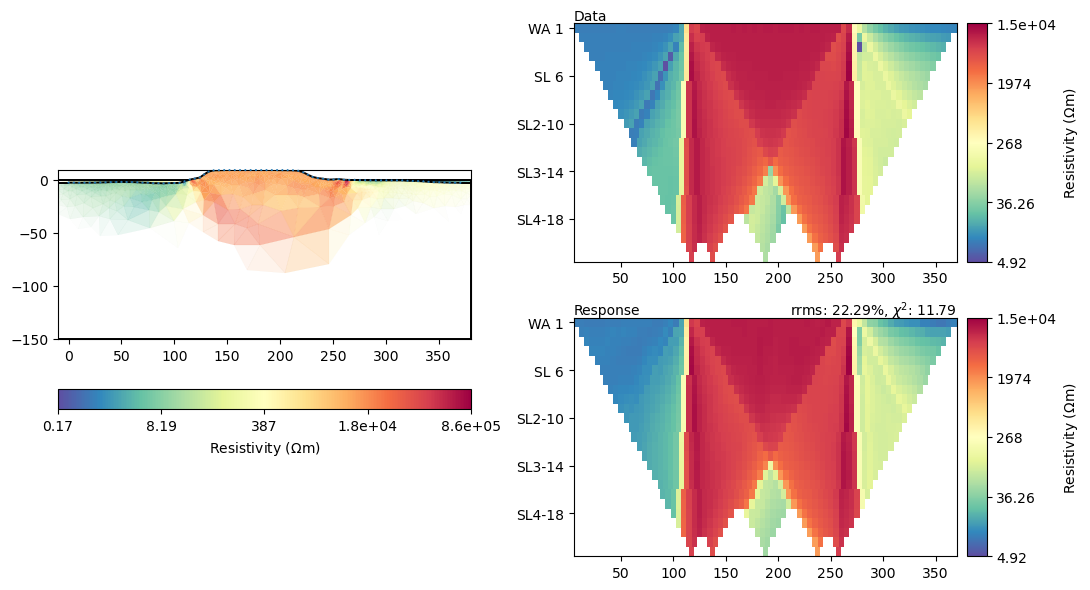

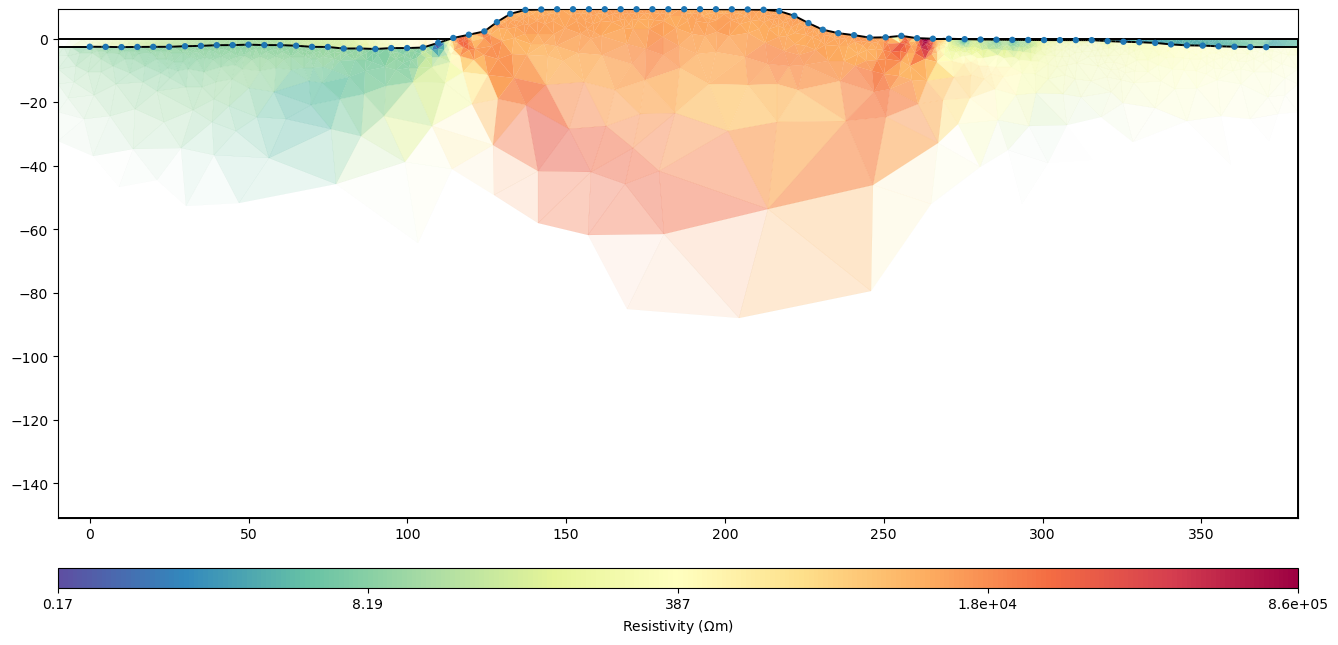

In [101]:
data_lbfw = ert.simulate(mesh_mod, scheme=data, res=rhomap_lbfw)
inv_lbfw = mgr.invert(data_lbfw, lam=10, verbose=True)
mgr.showResultAndFit()
mgr.saveResult(dir+ 'pygimli/all_inversions/FM_lbfw')

26/05/24 - 21:11:33 - pyGIMLi - INFO - Use median(data values)=5161.741568823981
26/05/24 - 21:11:33 - pyGIMLi - INFO - Created startmodel from forward operator: 9077, min/max=5161.741569/5161.741569
26/05/24 - 21:11:33 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000254919DD7B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002548C0E84F0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002548CF7ECF0>
min/max (data): 4.95/1.5e+04
min/max (error): 3%/9.07%
min/max (start model): 5162/5162
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 6336.30
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  472.27 (dPhi = 92.48%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  142.19 (dPhi = 69.48%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   63.56 (dPhi = 54.40%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   23.07 (dPhi = 61.11%) lam: 10.0
----------

26/05/24 - 21:23:09 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/FM_hbfw\ERTManager


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/FM_hbfw\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: >)

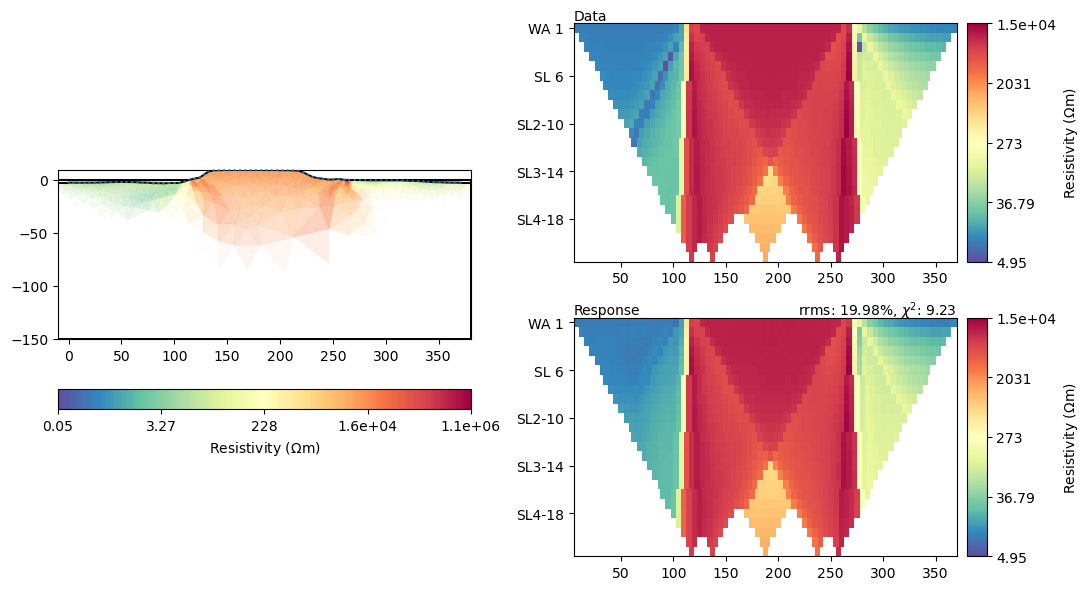

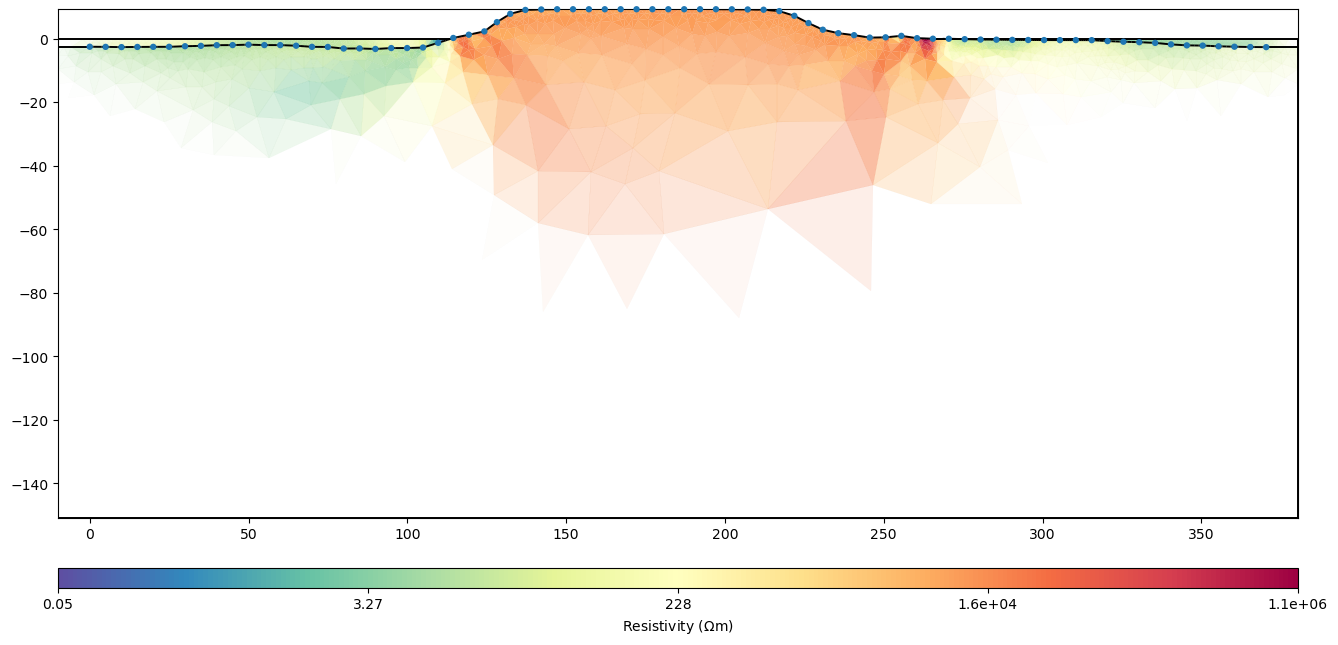

In [102]:
data_hbfw = ert.simulate(mesh_mod, scheme=data, res=rhomap_hbfw)
inv_hbfw = mgr.invert(data_hbfw, lam=10, verbose=True)
mgr.showResultAndFit()
mgr.saveResult(dir+ 'pygimli/all_inversions/FM_hbfw')

26/05/24 - 21:37:27 - pyGIMLi - INFO - Use median(data values)=4685.509926796197
26/05/24 - 21:37:27 - pyGIMLi - INFO - Created startmodel from forward operator: 9077, min/max=4685.509927/4685.509927
26/05/24 - 21:37:27 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000254919DD7B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002548C0E84F0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002548CF7ECF0>
min/max (data): 5.04/1.5e+04
min/max (error): 3%/9.07%
min/max (start model): 4686/4686
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 6769.82
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 1116.40 (dPhi = 83.41%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  307.86 (dPhi = 72.30%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   52.16 (dPhi = 81.92%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   22.16 (dPhi = 55.01%) lam: 10.0
----------

26/05/24 - 21:47:33 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/FM_lba\ERTManager


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/FM_lba\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: >)

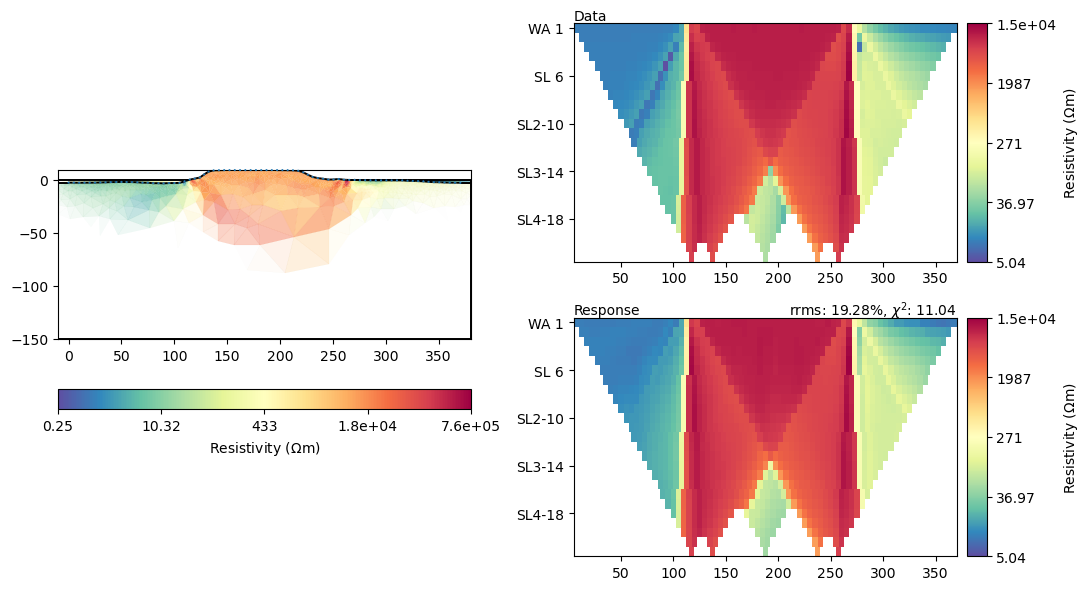

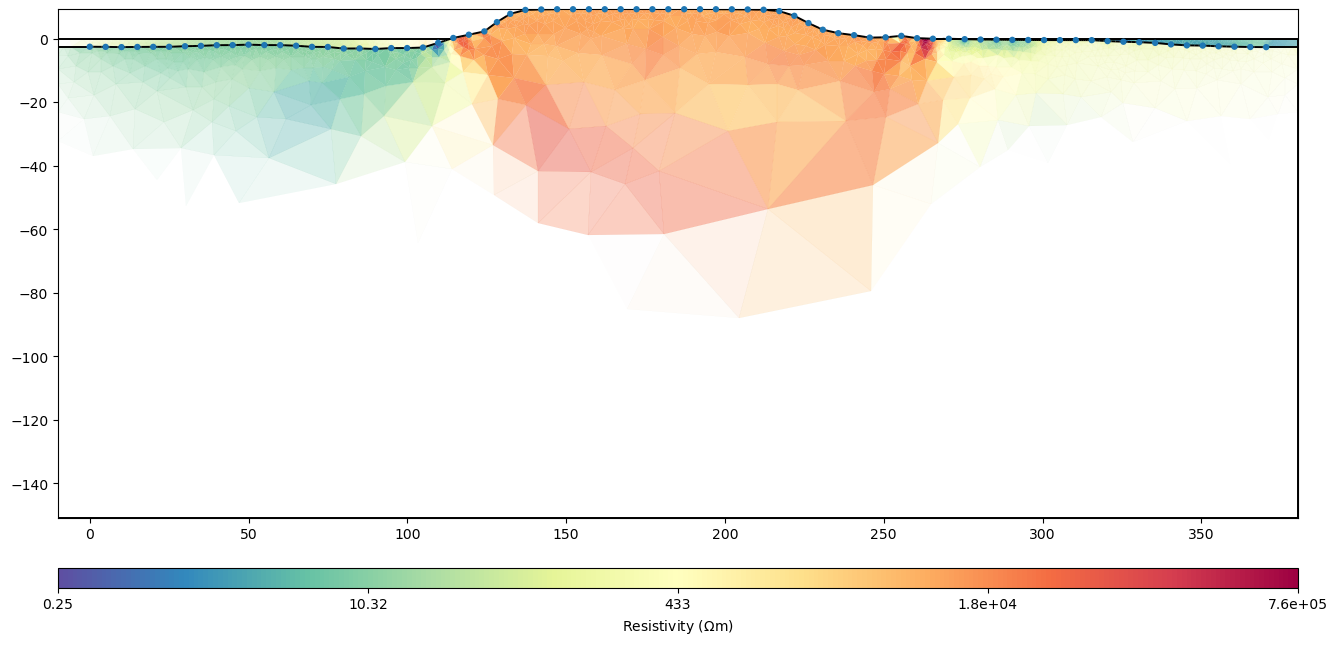

In [103]:
data_lba = ert.simulate(mesh_mod, scheme=data, res=rhomap_lba)
inv_lba = mgr.invert(data_lba, lam=10, verbose=True)
mgr.showResultAndFit()
mgr.saveResult(dir+ 'pygimli/all_inversions/FM_lba')

26/05/24 - 22:05:51 - pyGIMLi - INFO - Use median(data values)=5162.215347931273
26/05/24 - 22:05:51 - pyGIMLi - INFO - Created startmodel from forward operator: 9077, min/max=5162.215348/5162.215348
26/05/24 - 22:05:51 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000254919DD7B0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x000002548C0E84F0>
Model transformation: <pgcore._pygimli_.RTransLog object at 0x000002548CF7ECF0>
min/max (data): 5.08/1.5e+04
min/max (error): 3%/9.07%
min/max (start model): 5162/5162
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 6304.27
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  442.60 (dPhi = 92.91%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  138.50 (dPhi = 68.29%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =   58.14 (dPhi = 57.03%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 4 ... chi² =   20.82 (dPhi = 61.39%) lam: 10.0
----------

26/05/24 - 22:24:25 - pyGIMLi - INFO - Saving inversion results to: //smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/FM_hba\ERTManager


('//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/Tuk_all_mehriban/pygimli/all_inversions/FM_hba\\ERTManager',
 <Figure size 1600x1000 with 2 Axes>,
 <Axes: >)

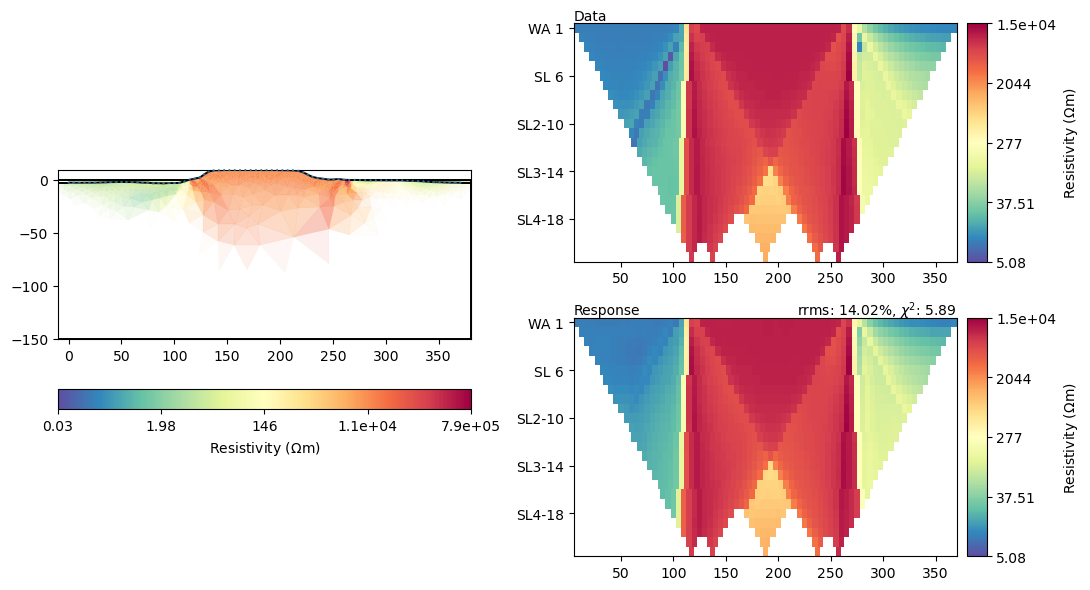

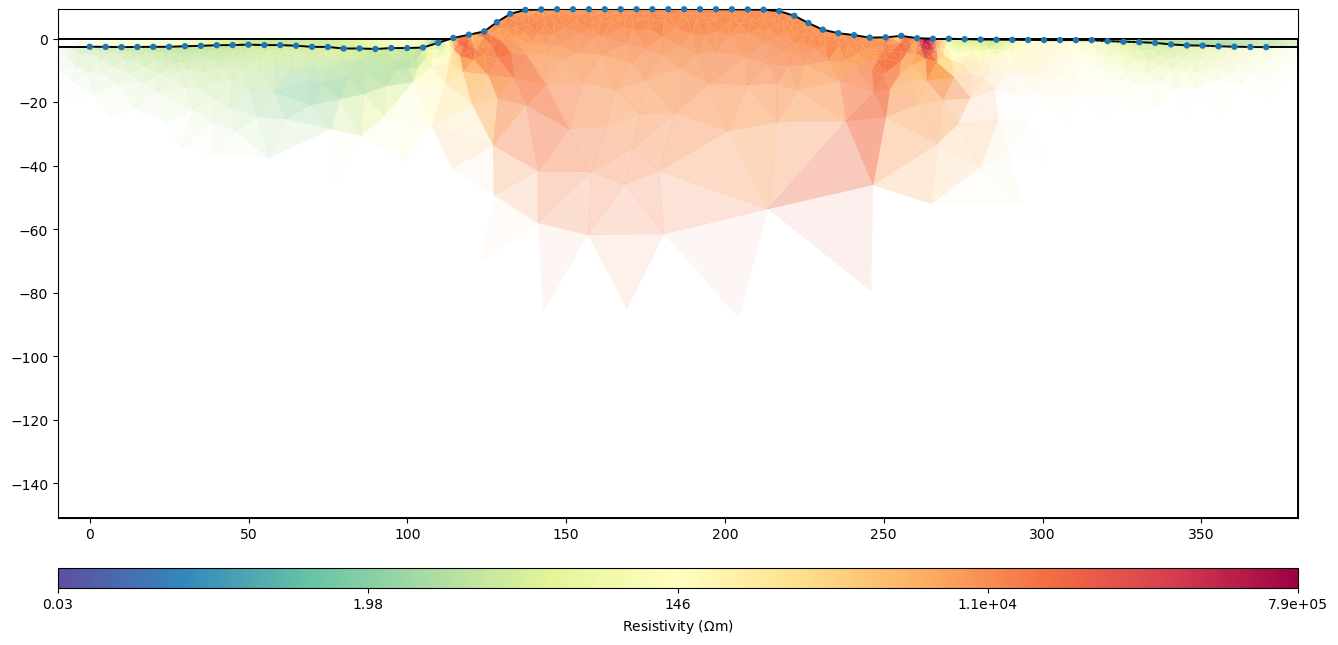

In [104]:
data_hba = ert.simulate(mesh_mod, scheme=data, res=rhomap_hba)
inv_hba = mgr.invert(data_hba, lam=10, verbose=True)
mgr.showResultAndFit()
mgr.saveResult(dir+ 'pygimli/all_inversions/FM_hba')

In [8]:
mesh_hbsw = pg.load(dir+'pygimli/all_inversions/FM_hbfw/ERTManager/resistivity-pd.bms')
res_hbsw = pg.load(dir+'pygimli/all_inversions/FM_hbfw/ERTManager/resistivity.vector')
cov_hbsw = pg.load(dir+'pygimli/all_inversions/FM_hbfw/ERTManager/resistivity-cov.vector')

mesh_lbsw = pg.load(dir+'pygimli/all_inversions/FM_lbsw/ERTManager/resistivity-pd.bms')
res_lbsw = pg.load(dir+'pygimli/all_inversions/FM_lbsw/ERTManager/resistivity.vector')
cov_lbsw = pg.load(dir+'pygimli/all_inversions/FM_lbsw/ERTManager/resistivity-cov.vector')

mesh_hbfw = pg.load(dir+'pygimli/all_inversions/FM_hbfw/ERTManager/resistivity-pd.bms')
res_hbfw = pg.load(dir+'pygimli/all_inversions/FM_hbfw/ERTManager/resistivity.vector')
cov_hbfw = pg.load(dir+'pygimli/all_inversions/FM_hbfw/ERTManager/resistivity-cov.vector')

mesh_lbfw = pg.load(dir+'pygimli/all_inversions/FM_lbfw/ERTManager/resistivity-pd.bms')
res_lbfw = pg.load(dir+'pygimli/all_inversions/FM_lbfw/ERTManager/resistivity.vector')
cov_lbfw = pg.load(dir+'pygimli/all_inversions/FM_lbfw/ERTManager/resistivity-cov.vector')

mesh_hba = pg.load(dir+'pygimli/all_inversions/FM_hba/ERTManager/resistivity-pd.bms')
res_hba = pg.load(dir+'pygimli/all_inversions/FM_hba/ERTManager/resistivity.vector')
cov_hba = pg.load(dir+'pygimli/all_inversions/FM_hba/ERTManager/resistivity-cov.vector')

mesh_lba = pg.load(dir+'pygimli/all_inversions/FM_lba/ERTManager/resistivity-pd.bms')
res_lba = pg.load(dir+'pygimli/all_inversions/FM_lba/ERTManager/resistivity.vector')
cov_lba = pg.load(dir+'pygimli/all_inversions/FM_lba/ERTManager/resistivity-cov.vector')


Text(0.5, 86.12222222222222, 'Logarithmic Scale of Resistivity (ohm-m)')

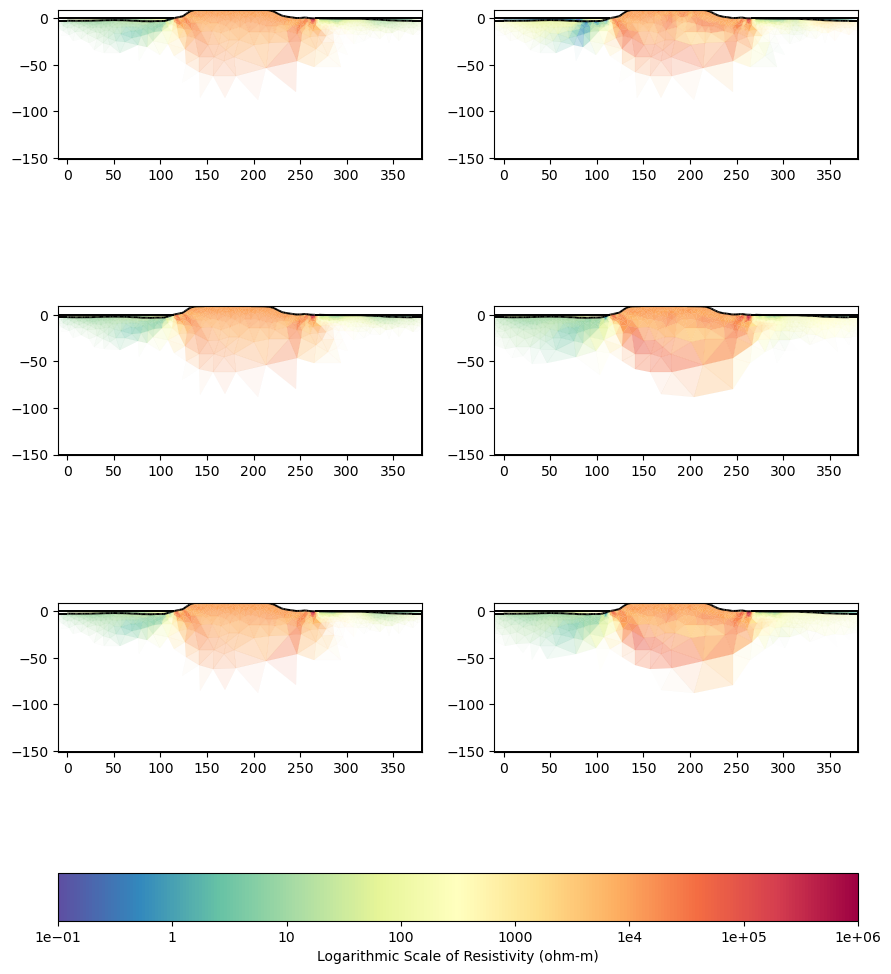

In [10]:
from matplotlib.ticker import LogLocator, LogFormatter
fig, ax = plt.subplots(3, 2, figsize=(10, 12))

# Plot on the subplots
pg.show(mesh_hbsw, res_hbsw, logScale=True, cMap="Spectral_r", ax=ax[0, 0], cMin=0.1, cMax=1000000,colorBar=False, coverage=cov_hbsw)
pg.show(mesh_lbsw, res_lbsw, logScale=True, cMap="Spectral_r", ax=ax[0, 1], cMin=0.1, cMax=1000000,colorBar=False, coverage=cov_hbsw)
pg.show(mesh_hbfw, res_hbfw, logScale=True, cMap="Spectral_r", ax=ax[1, 0], cMin=0.1, cMax=1000000,colorBar=False, coverage=cov_hbfw)
pg.show(mesh_lbfw, res_lbfw, logScale=True, cMap="Spectral_r", ax=ax[1, 1], cMin=0.1, cMax=1000000,colorBar=False, coverage=cov_lbfw)
pg.show(mesh_hba, res_hba, logScale=True, cMap="Spectral_r", ax=ax[2, 0], cMin=0.1, cMax=1000000,colorBar=False, coverage=cov_hba)
pg.show(mesh_lba, res_lba, logScale=True, cMap="Spectral_r", ax=ax[2, 1], cMin=0.1, cMax=1000000,colorBar=False, coverage=cov_lba)


plt.subplots_adjust(left=0.1, right=0.9, bottom=0.2, top=0.9, wspace=0.2) 

# Add titles, labels, etc.
#ax[0].set_title('Eastern')
#ax[1].set_title('Western')
#ax[0].set_ylim(-50, 15)
#ax[1].set_ylim(-50, 15)
#ax.set_xlim(-11,381)


cax = fig.add_axes([0.1, 0.1, 0.8, 0.04])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=0.1, cMax=1000000, logScale=True, cMap="Spectral_r")

# Set aspect ratio to equal for both subplots
#ax[0].set_aspect(2)
#ax[1].set_aspect(1.1)


cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Logarithmic Scale of Resistivity (ohm-m)', fontsize=10)

RuntimeError: ./core/src/vector.h:688		GIMLI::Vector<ValueType>& GIMLI::Vector<ValueType>::operator-=(const GIMLI::Vector<ValueType>&) [with ValueType = double]  1197 != 9077

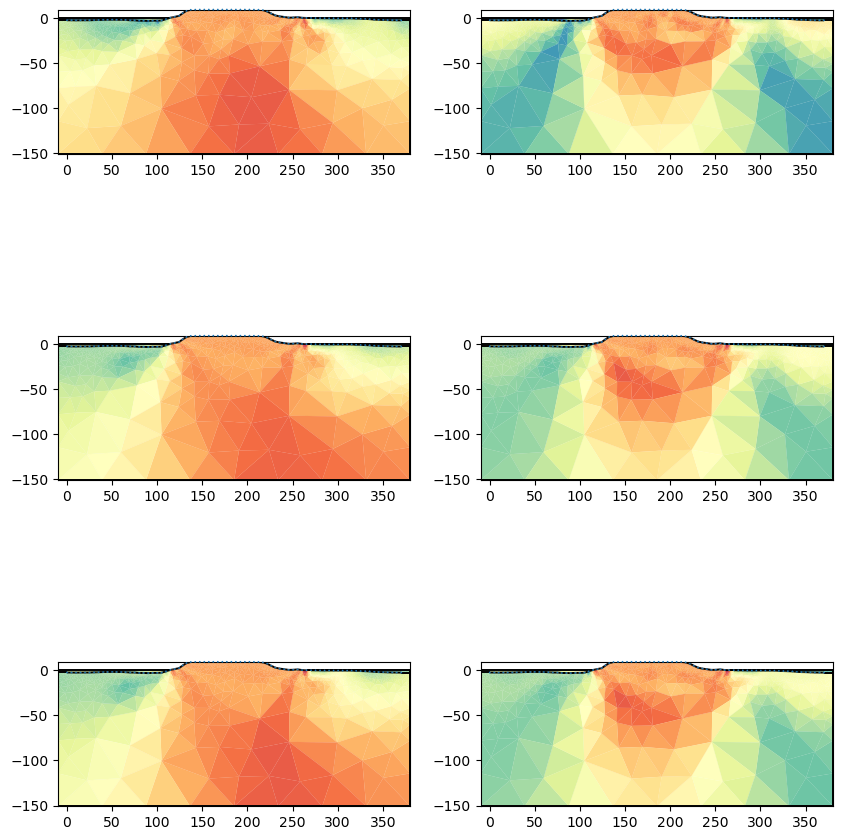

In [87]:
from matplotlib.ticker import LogLocator, LogFormatter
fig, ax = plt.subplots(3, 2, figsize=(10, 12))

mgr.showResult(inv_hbsw, ax=ax[0, 0], coverage=1, colorBar=False, cMin=0.1, cMax=1000000)
mgr.showResult(inv_lbsw, ax=ax[0, 1], coverage=1, colorBar=False, cMin=0.1, cMax=1000000)
mgr.showResult(inv_hbfw, ax=ax[1, 0], coverage=1, colorBar=False, cMin=0.1, cMax=1000000)
mgr.showResult(inv_lbfw, ax=ax[1, 1], coverage=1, colorBar=False, cMin=0.1, cMax=1000000)
mgr.showResult(inv_hba, ax=ax[2, 0], coverage=1, colorBar=False, cMin=0.1, cMax=1000000)
mgr.showResult(inv_lba, ax=ax[2, 1], coverage=1, colorBar=False, cMin=0.1, cMax=1000000)



ax[0, 0].set_title('inv_hbsw')
ax[0, 1].set_title('inv_lbsw')
ax[1, 0].set_title('inv_hbfw')
ax[1, 1].set_title('inv_lbfw')
ax[2, 0].set_title('inv_hba')
ax[2, 1].set_title('inv_lba')

#ax[0, 0].text(mgr.inv.chi2(inv_hbsw), mgr.inv.absrms(inv_hbsw), mgr.inv.relrms(inv_hbsw))
#ax[0, 1].text('inv_lbsw')
#ax[1, 0].text('inv_hbfw')
#ax[1, 1].text('inv_lbfw')
#ax[2, 0].text('inv_hba')
#ax[2, 1].text('inv_lba')

#print(mgr.inv.chi2(inv_hbsw), mgr.inv.absrms(inv_hbsw), mgr.inv.relrms(inv_hbsw))



cax = fig.add_axes([0.1, 0.1, 0.8, 0.02])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, cMin=0.1, cMax=1000000, logScale=True, cMap="Spectral_r")

cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Logarithmic Scale of Resistivity (ohm-m)', fontsize=10)


<class 'shapely.geometry.polygon.Polygon'>
Bounds of the study region: minx=341864.0620351979, miny=7709363.179982299, maxx=343971.14058601815, maxy=7711180.144046698
Extent: [341863.0620351979, 343972.14058601815, 7709362.179982299, 7711181.144046698]


0 -10.0 -2.524
1 -10.0 -150.8110641508107
2 380.40414484508244 -150.8110641508107
3 380.40414484508244 -2.649406212777715
4 -380.40414484508244 -2.524
5 -380.40414484508244 -521.0898027831155
6 750.8082896901649 -2.649406212777715
7 750.8082896901649 -521.2152089958932
8 0.0 -2.524
9 1.2499516028108906 -2.5349995741047358
10 3.749854808432672 -2.5569987223142077
11 4.999806411243562 -2.5679982964189434
12 6.249658216467371 -2.587245694797942
13 8.749361826914988 -2.625740491555939
14 9.999213632138797 -2.6449878899349377
15 11.249135228533955 -2.630993997401589
16 13.74897842132427 -2.603006212334891
17 14.998900017719428 -2.5890123198015424
18 16.24887898062829 -2.581760956840592
19 18.748836906446023 -2.567258230918692
20 19.998815869354885 -2.5600068679577417
21 21.24880946594051 -2.556006118763748
22 23.74879665911176 -2.548004620375762
23 24.998790255697386 -2.5440038711817685
24 26.24797223120185 -2.4987934640590033
25 28.746336182210783 -2.408372649813473
26 29.995518157715246 -

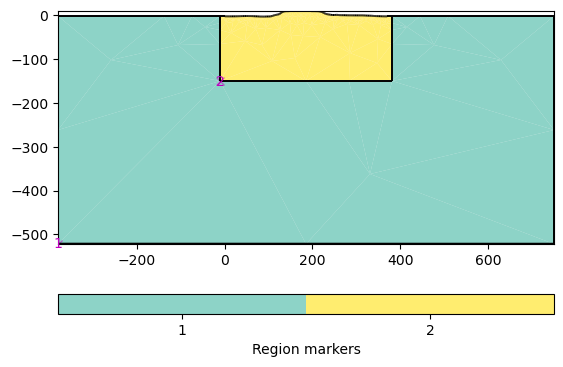

In [11]:
plc = mt.createParaMeshPLC(data,paraDX = 0.25, paraDZ= 0.25, boundary=1, balanceDepth=True)
ax, _ = pg.show(plc)

for i, n in enumerate(plc.nodes()[:]):
    #ax.text(n.x(), n.y(), str(i))
    print(i, n.x(), n.y())
for nr, marker in enumerate(plc.regionMarkers()):
    print('Position marker number {}:'.format(nr + 1), marker.x(), marker.y(),
          marker.z())


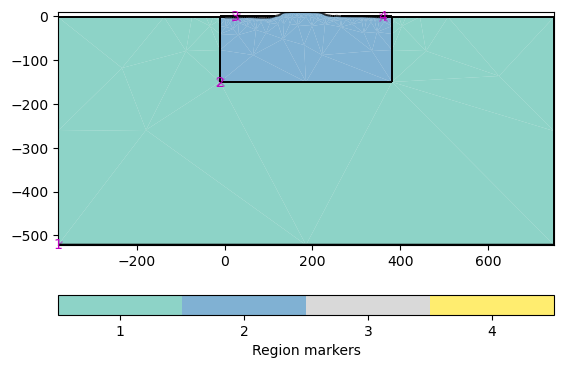

In [7]:
l1 = mt.createLine([-10,0], [-10, -5])
l2 = mt.createLine([-10,0], [114.46263419360339, 0])
l3 = mt.createLine([265.47100473984017,0], [380.40414484508244, 0])
l4 = mt.createLine([380.40414484508244,0], [380.40414484508244, -5])

plc2 = mt.mergePLC([plc, l1, l2, l3, l4])
  
plc2.addRegionMarker([25, -1], marker=3)  
plc2.addRegionMarker([360, -1.5], marker=4)  

ax, _ = pg.show(plc2)
#ax.set_ylim(-5)
#ax.set_xlim(-11,381)

08/05/24 - 09:12:01 - pyGIMLi - INFO - Found 4 regions.
08/05/24 - 09:12:01 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
08/05/24 - 09:12:01 - pyGIMLi - INFO - Creating forward mesh from region infos.
08/05/24 - 09:12:02 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
08/05/24 - 09:12:02 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 19709 Cells: 37296 Boundaries: 29032
08/05/24 - 09:12:03 - pyGIMLi - INFO - Use median(data values)=421.875
08/05/24 - 09:12:03 - pyGIMLi - INFO - Created startmodel from forward operator: 9077, min/max=421.875000/421.875000
08/05/24 - 09:12:03 - pyGIMLi - INFO - Starting inversion.


fop: <pygimli.physics.ert.ertModelling.ERTModelling object at 0x00000227BC2DBCE0>
Data transformation: <pgcore._pygimli_.RTransLogLU object at 0x00000227FF7C4590>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000227800DF1B0>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x00000227800DF220>
	 2 <pgcore._pygimli_.RTransLogLU object at 0x00000227800DF290>
min/max (data): 1.82/4413
min/max (error): 3%/9.07%
min/max (start model): 422/422
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 2447.59
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  829.26 (dPhi = 66.11%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  639.60 (dPhi = 22.87%) lam: 10.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  260.72 (dPhi = 59.19%) lam: 10.0
-----

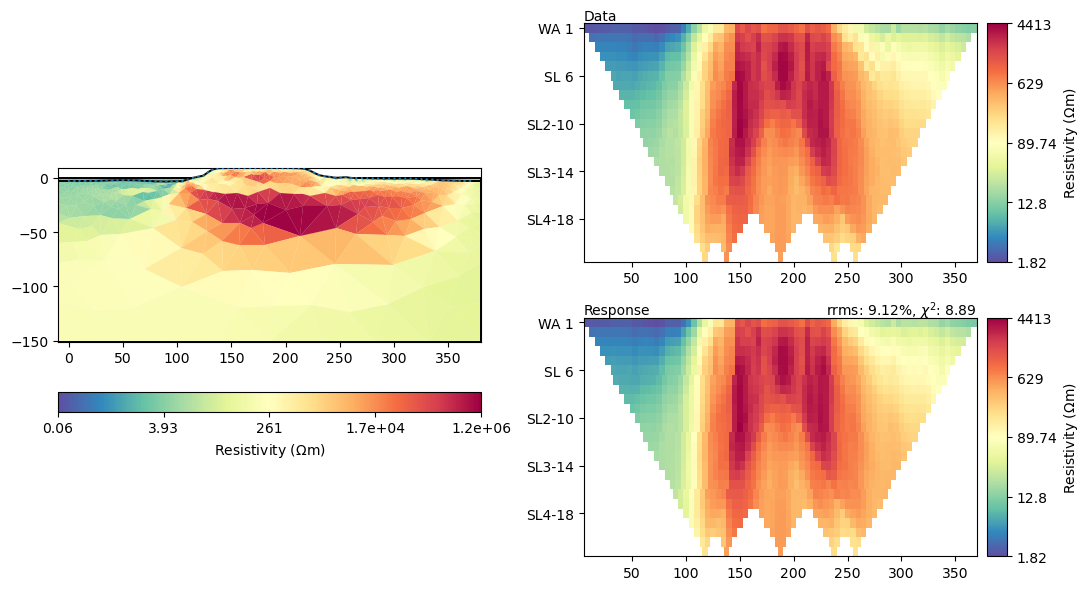

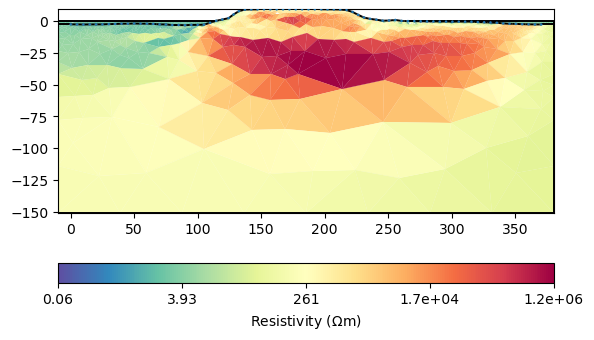

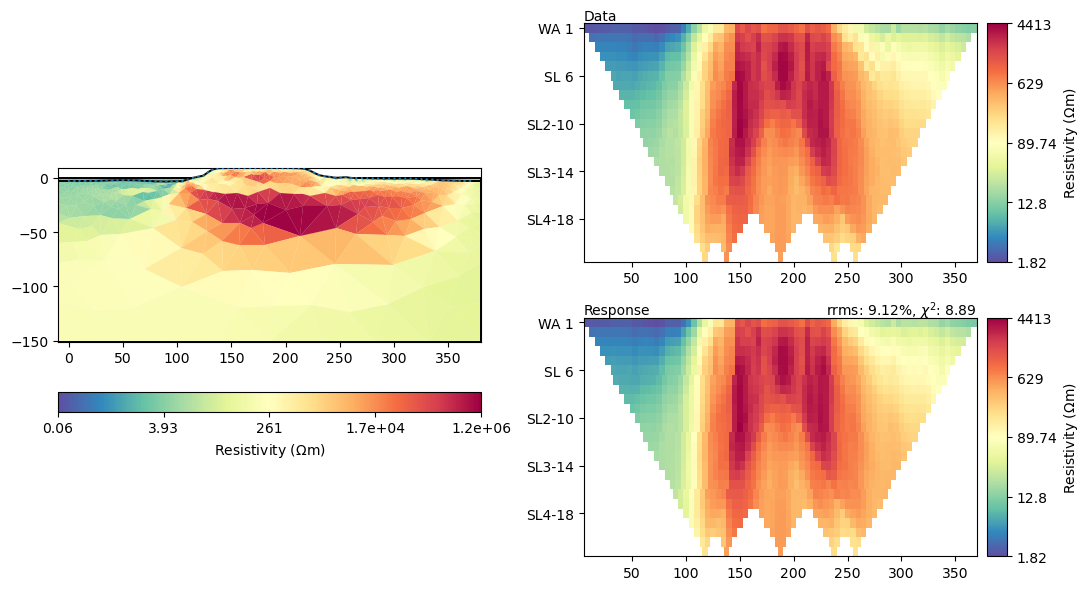

In [10]:
mesh = mt.createMesh(plc2)
mgr.setMesh(mesh)


mgr.inv.setRegularization(3, limits=[1, 2])
mgr.inv.setRegularization(4, limits=[3, 4])

mgr.invert(data, verbose=True, paraDX = 0.25, paraDZ= 0.25, lam=10, zWeight=0.1, RobustData=True, BlockyModel=True)

mgr.showResult()
mgr.showResultAndFit()

(-40.0, 10.28)

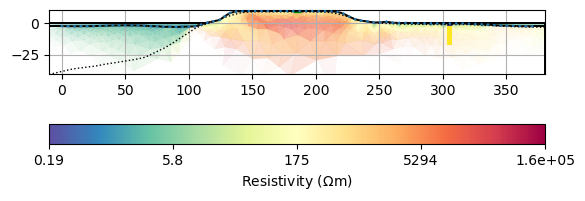

In [24]:
from pygimli.viewer.mpl import draw1DColumn

borehole4 = pd.read_csv(dir + "pygimli/borehole4.csv")
AL = np.loadtxt(dir + "pygimli/AL_eastern.txt")

x = borehole4['x']
z = borehole4['z']
r = borehole4['r']

x_AL = AL[0]
z_AL = AL[1]

ax, cb = mgr.showResult()
zz = np.abs(z)
iz = np.argsort(z)
dz = np.diff(zz[iz])
thk = np.hstack([dz, dz[-1]])
ztop = -zz[iz[0]]-dz[0]/2
colkw = dict(x=x[0], val=r[iz], thk=thk, width=4, ztopo=ztop)
draw1DColumn(ax, **colkw)
ax.plot(ibpt_x, ibpt_depth_smoothed, ":", linewidth=1, color='black')
ax.plot(x_AL, z_AL, 'g_', linewidth=0.1)
ax.grid(True)
ax.set_ylim(-40)

In [ ]:
ddir = '//smb.isipd.dmawi.de/projects/p_subaqua/Expeditions/2023/NWT2023/analysis_Tuk/ERT_sump/mehriban/10_Aug_KamikF38/res2dinv_inputs/'
dd = ert.load(ddir+'DD_ele_nogps.dat')
dd.save(ddir+"dd.txt", "a b m n err rhoa")
print(open(ddir+"dd.txt").read())



In [ ]:
ws = ert.load(ddir+"WS_ele_gps_noerror.dat")
ws.save(ddir+"ws.txt", "a b m n err rhoa")
print(open(ddir+"ws.txt").read())

In [ ]:
wsrec = ert.load(ddir+"WS_rec_ele_nogps_noerror.dat")
wsrec.save(ddir+"wsrec.txt", "a b m n err rhoa")
print(open(ddir+"wsrec.txt").read())